In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\elabo\AppData\Local\Temp\ipykernel_20008\2101045125.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  file1 = pd.read_csv(r"D:\MannPeptideResults\A549_AllPeptides.psmtsv", sep='\t')
C:\Users\elabo\AppData\Local\Temp\ipykernel_20008\2101045125.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  file2 = pd.read_csv(r"D:\MannPeptideResults\GAMG_AllPeptides.psmtsv", sep='\t')


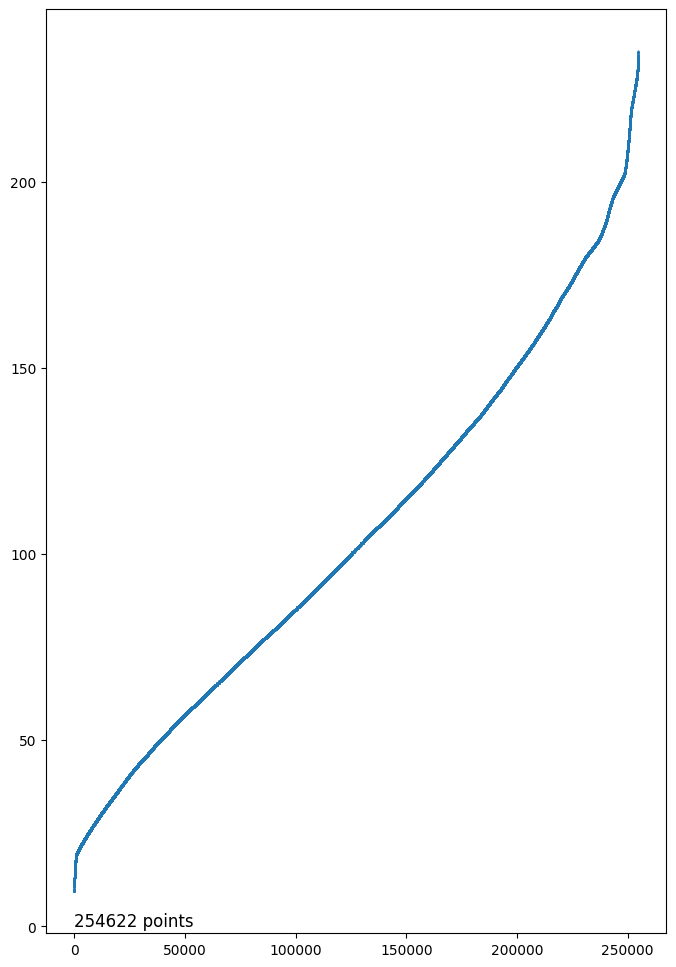

In [162]:
file1 = pd.read_csv(r"D:\MannPeptideResults\A549_AllPeptides.psmtsv", sep='\t')
file2 = pd.read_csv(r"D:\MannPeptideResults\GAMG_AllPeptides.psmtsv", sep='\t')

#overlapping full sequences
overlap = pd.merge(file1, file2, on=['Full Sequence'], how='inner')

#linear regression model on the overlapping peptides
from sklearn.linear_model import LinearRegression

X = overlap['Scan Retention Time_y'].values.reshape(-1,1)
y = overlap['Scan Retention Time_x'].values.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

# replace the y values with the predicted values
overlap['Scan Retention Time_y'] = y_pred

# concatenate the two dataframes
frames = [file1, file2]

# if frames file name is the same as file 2, transform the Scan Retention Time using the linear regression

for i in range(len(frames)):
    if frames[i]["File Name"].equals(file1["File Name"][0]) == False:
        X = frames[i]['Scan Retention Time'].values.reshape(-1,1)
        y = model.predict(X)
        frames[i]['Scan Retention Time'] = y

result = pd.concat(frames)

#order by retention time
result = result.sort_values(by=['Scan Retention Time'])

#plot the retention time
plt.scatter(range(len(result)), result['Scan Retention Time'], s = 0.3)
#how many points in the plot
plt.text(0, 0, str(len(result)) + " points", fontsize=12)
plt.show()


In [201]:
import tqdm

file1 = pd.read_csv(r"D:\MannPeptideResults\A549_AllPsms.psmtsv", sep='\t')

# drop rows with q value more than than 0.01
file1 = file1[file1['QValue'] < 0.01]

# drop rows with ambiguous 
file1 = file1[file1['Ambiguity Level'] == "1"]

# drop rows with decoy
file1 = file1[file1['Decoy/Contaminant/Target'] == "T"]

# drop rows with PEP > 0.5
file1 = file1[file1['PEP'] < 0.5]

# Split the dataframe into multiple dataframes based on the file name
file_1_fractions = [file1[file1["File Name"] == x] for x in file1["File Name"].unique()]

# get overlapping full sequences 
overlap = pd.merge(file_1_fractions[0], file_1_fractions[1], on=['Full Sequence'], how='inner')

# linear regression model on the overlapping peptides
from sklearn.linear_model import LinearRegression

X = overlap['Scan Retention Time_y'].values.reshape(-1,1)
y = overlap['Scan Retention Time_x'].values.reshape(-1,1)

from scipy import stats

z_scores = stats.zscore(overlap['Scan Retention Time_x'])
overlap = overlap[(z_scores < 3) & (z_scores > -3)] 

# reject overlapping sequences that their retention time has a standard deviation of more than 3 standard deviations
# std = np.std(overlap['Scan Retention Time_x'])
# mean = np.mean(overlap['Scan Retention Time_x'])
# overlap = overlap[overlap['Scan Retention Time_x'] < mean + 3*std]
# overlap = overlap[overlap['Scan Retention Time_x'] > mean - 3*std]

X = overlap['Scan Retention Time_y'].values.reshape(-1,1)
y = overlap['Scan Retention Time_x'].values.reshape(-1,1)

model = LinearRegression(positive=True)
model.fit(X, y)

    # if result.loc[i, ['Scan Retention Time_x']] is pd.NA:
    #     X = result.loc[i, ['Scan Retention Time_y']].to_numpy().reshape(-1,1)
    #     y = model.predict(X)
    #     result.loc[i, ['Transformed Retention Time']] = y.reshape(-1,1).astype(float)
    # else:
    #     result.loc[i, ['Transformed Retention Time']] = result.loc[i, ["Scan Retention Time_x"]].to_numpy().reshape(-1,1).astype(float)
# file2 = pd.read_csv(r"D:\MannPeptideResults\GAMG_AllPeptides.psmtsv", sep='\t')

# #overlapping full sequences
# overlap = pd.merge(file1, file2, on=['Full Sequence'], how='inner')

# #linear regression model on the overlapping peptides
# from sklearn.linear_model import LinearRegression

# overlap = overlap.sort_values(by = 'Scan Retention Time_x')

# X = overlap['Scan Retention Time_y'].values.reshape(-1,1)
# y = overlap['Scan Retention Time_x'].values.reshape(-1,1)

# model = LinearRegression()
# model.fit(X, y)

# # merge the two dataframes by the Full Sequence
# result = pd.merge(file1, file2, on=['Full Sequence'], how='outer')

# # drop if file1 is NaN or file2 is NaN
# result.sample(frac=1)
# result["Transformed Retention Time"] = 0

# # if the result row doesnt have file1 name, replace the Scan Retention Time with the predicted value using the linear regression
# for i in tqdm.tqdm(range(len(result))):
#     if result.loc[i, ['Scan Retention Time_y']].isnull().any() == False:
#         X = result.loc[i, ['Scan Retention Time_y']].to_numpy().reshape(-1,1)
#         y = model.predict(X)
#         result.loc[i, ['Transformed Retention Time']] = y.reshape(-1,1).astype(float)
#     else:
#         result.loc[i, ['Transformed Retention Time']] = result.loc[i, ["Scan Retention Time_x"]].to_numpy().reshape(-1,1).astype(float)
#     # if result.loc[i, ['Scan Retention Time_x']] is pd.NA:
#     #     X = result.loc[i, ['Scan Retention Time_y']].to_numpy().reshape(-1,1)
#     #     y = model.predict(X)
#     #     result.loc[i, ['Transformed Retention Time']] = y.reshape(-1,1).astype(float)
#     # else:
#     #     result.loc[i, ['Transformed Retention Time']] = result.loc[i, ["Scan Retention Time_x"]].to_numpy().reshape(-1,1).astype(float)
# print how many overlapping points we have
print(len(X))

C:\Users\elabo\AppData\Local\Temp\ipykernel_38600\2389190059.py:3: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  file1 = pd.read_csv(r"D:\MannPeptideResults\A549_AllPsms.psmtsv", sep='\t')


16810


In [202]:
# merge the two dataframes by the Full Sequence
result = pd.merge(file_1_fractions[0], file_1_fractions[1], on=['Full Sequence'], how='outer')

result["Transformed Retention Time"] = 0

# if the result row doesnt have file1 name, replace the Scan Retention Time with the predicted value using the linear regression
for i in tqdm.tqdm(range(len(result))):
    if result.loc[i, ['Scan Retention Time_y']].isnull().any() == False and result.loc[i, ['Scan Retention Time_x']].isna().any() == False:
        X = result.loc[i, ['Scan Retention Time_y']].to_numpy().reshape(-1, 1)
        y = model.predict(X)
        result.loc[i, ['Transformed Retention Time']] = y.reshape(-1).astype(float)
    else:
        result.loc[i, ['Transformed Retention Time']] = result.loc[i, ["Scan Retention Time_x"]].to_numpy().reshape(-1).astype(float)

  0%|          | 0/34625 [00:00<?, ?it/s]C:\Users\elabo\AppData\Local\Temp\ipykernel_38600\1188044695.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '69.7420505594761' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  result.loc[i, ['Transformed Retention Time']] = y.reshape(-1).astype(float)
100%|██████████| 34625/34625 [01:49<00:00, 315.06it/s]


Plotting...


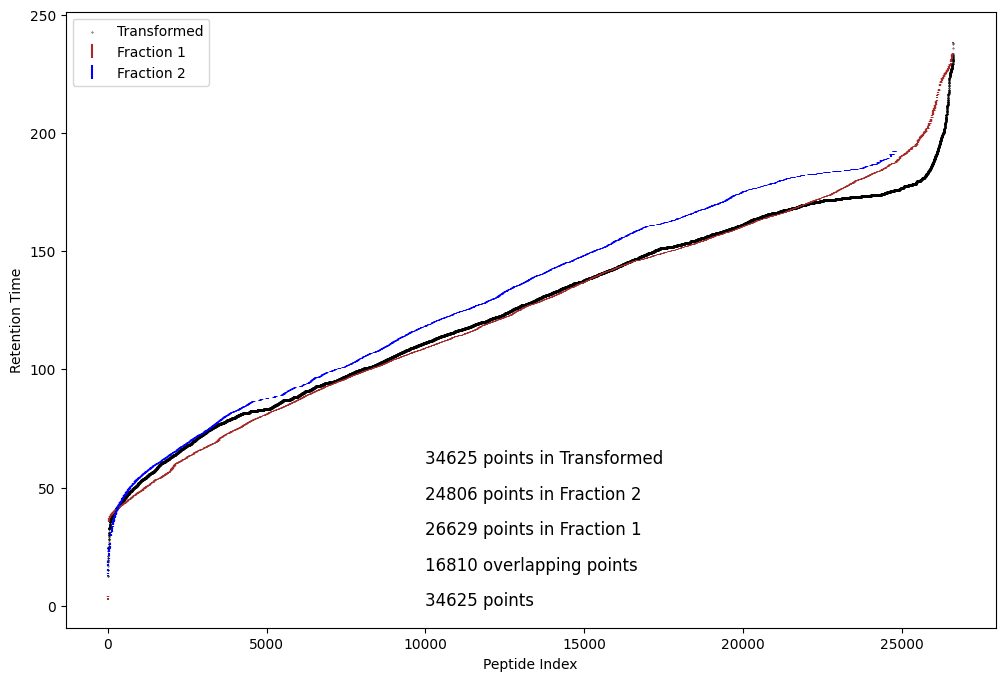

In [203]:
print("Plotting...")

# clear the plot
plt.clf()
# drop Scan Retention Time_x that are nan 
x_times = result.dropna(subset=['Scan Retention Time_x']).sort_values(by = "Scan Retention Time_x")["Scan Retention Time_x"].values.reshape(-1)
# x_times = result.sort_values(by = "Scan Retention Time_x")["Scan Retention Time_x"].values.reshape(-1)
y_times = result.dropna(subset=["Scan Retention Time_y"]).sort_values(by = "Scan Retention Time_y")["Scan Retention Time_y"].values.reshape(-1)

# order by transformed retention time
sorted_result = result.sort_values(by=['Transformed Retention Time'])

plt.errorbar(range(x_times.size), x_times, linestyle="", c='brown', yerr=0.1, label = "Fraction 1")
plt.errorbar(range(y_times.size), y_times, linestyle="", c='blue', yerr=0.1, label = "Fraction 2")
plt.scatter(range(len(sorted_result)), sorted_result["Transformed Retention Time"].values.reshape(-1), s = 0.1, c='k', label = "Transformed")
# shared points
plt.text(10000, 0, str(len(sorted_result)) + " points", fontsize=12)
# overlapping points
plt.text(10000, 15, str(len(overlap)) + " overlapping points", fontsize=12)
#how many points in x_times, y_times, and sorted_result
plt.text(10000, 30, str(len(x_times)) + " points in Fraction 1", fontsize=12)
plt.text(10000, 45, str(len(y_times)) + " points in Fraction 2", fontsize=12)
plt.text(10000, 60, str(len(sorted_result)) + " points in Transformed", fontsize=12)
plt.xlabel("Peptide Index")
plt.ylabel("Retention Time")
plt.legend()
plt.show()


# LOWESS Model

In [214]:
import statsmodels.api as sm
class LoessRegressor:
    def __init__(self, frac=0.2, iterations=3):
        self.frac = frac
        self.fitted_values_ = None
        self.X_ = None
        self.iterations = iterations
    
    def fit(self, X, y):
        self.X_ = X
        lowess = sm.nonparametric.lowess
        self.fitted_values_ = lowess(y, X, frac=self.frac, it=self.iterations)
        return self
    
    def predict(self, X):
        if self.fitted_values_ is None:
            raise ValueError("The model is not fitted yet. Please call 'fit' before 'predict'.")
        
        # Interpolate the fitted values for the prediction
        fitted_X = self.fitted_values_[:, 0]
        fitted_y = self.fitted_values_[:, 1]
        
        # Use numpy's interpolation function
        return np.interp(X, fitted_X, fitted_y)

In [225]:
import tqdm

file1 = pd.read_csv(r"D:\MannPeptideResults\A549_AllPsms.psmtsv", sep='\t')

# drop rows with q value more than than 0.01
file1 = file1[file1['QValue'] < 0.01]

# drop rows with ambiguous 
file1 = file1[file1['Ambiguity Level'] == "1"]

# drop rows with decoy
file1 = file1[file1['Decoy/Contaminant/Target'] == "T"]

# drop rows with PEP > 0.5
file1 = file1[file1['PEP'] < 0.5]

# Split the dataframe into multiple dataframes based on the file name
file_1_fractions = [file1[file1["File Name"] == x] for x in file1["File Name"].unique()]

# get overlapping full sequences 
overlap = pd.merge(file_1_fractions[0], file_1_fractions[1], on=['Full Sequence'], how='inner')

from scipy import stats

z_scores = stats.zscore(overlap['Scan Retention Time_x'])
overlap = overlap[(z_scores < 3) & (z_scores > -3)] 

X = overlap['Scan Retention Time_y'].values.reshape(-1)
y = overlap['Scan Retention Time_x'].values.reshape(-1)

# lowess regression model on the overlapping peptides
model = LoessRegressor(frac=0.05)
model.fit(X, y)

# merge the two dataframes by the Full Sequence
result = pd.merge(file_1_fractions[0], file_1_fractions[1], on=['Full Sequence'], how='outer')

result["Transformed Retention Time"] = 0

# if the result row doesnt have file1 name, replace the Scan Retention Time with the predicted value using the linear regression
for i in tqdm.tqdm(range(len(result))):
    if result.loc[i, ['Scan Retention Time_y']].isnull().any() == False and result.loc[i, ['Scan Retention Time_x']].isna().any() == False:
        X = result.loc[i, ['Scan Retention Time_y']].to_numpy().astype(np.float64).reshape(-1, 1)
        # print(X)
        y = model.predict(X)
        result.loc[i, ['Transformed Retention Time']] = y.reshape(-1).astype(float)
    else:
        result.loc[i, ['Transformed Retention Time']] = result.loc[i, ["Scan Retention Time_x"]].to_numpy().reshape(-1).astype(float)

print(len(X))

Plotting...


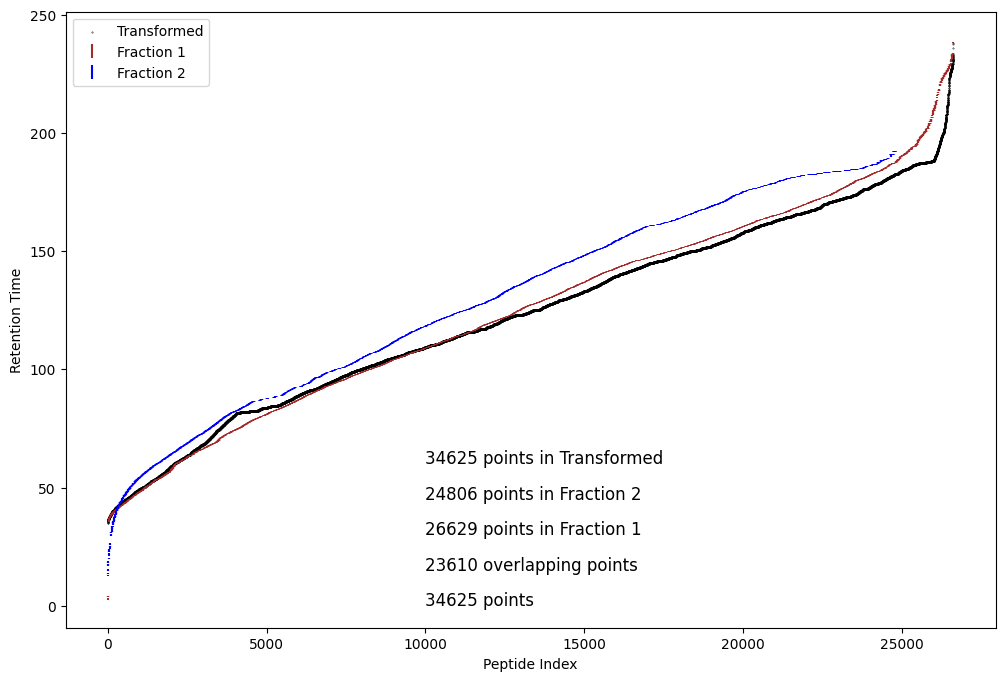

In [ ]:
print("Plotting...")

# clear the plot
plt.clf()
# drop Scan Retention Time_x that are nan 
x_times = result.dropna(subset=['Scan Retention Time_x']).sort_values(by = "Scan Retention Time_x")["Scan Retention Time_x"].values.reshape(-1)
# x_times = result.sort_values(by = "Scan Retention Time_x")["Scan Retention Time_x"].values.reshape(-1)
y_times = result.dropna(subset=["Scan Retention Time_y"]).sort_values(by = "Scan Retention Time_y")["Scan Retention Time_y"].values.reshape(-1)

# order by transformed retention time
sorted_result = result.sort_values(by=['Transformed Retention Time'])

plt.errorbar(range(x_times.size), x_times, linestyle="", c='brown', yerr=0.1, label = "Fraction 1")
plt.errorbar(range(y_times.size), y_times, linestyle="", c='blue', yerr=0.1, label = "Fraction 2")
plt.scatter(range(len(sorted_result)), sorted_result["Transformed Retention Time"].values.reshape(-1), s = 0.1, c='k', label = "Transformed")
# shared points
plt.text(10000, 0, str(len(sorted_result)) + " points", fontsize=12)
# overlapping points
plt.text(10000, 15, str(len(overlap)) + " overlapping points", fontsize=12)
#how many points in x_times, y_times, and sorted_result
plt.text(10000, 30, str(len(x_times)) + " points in Fraction 1", fontsize=12)
plt.text(10000, 45, str(len(y_times)) + " points in Fraction 2", fontsize=12)
plt.text(10000, 60, str(len(sorted_result)) + " points in Transformed", fontsize=12)
plt.xlabel("Peptide Index")
plt.ylabel("Retention Time")
plt.legend()
plt.show()

Plotting...


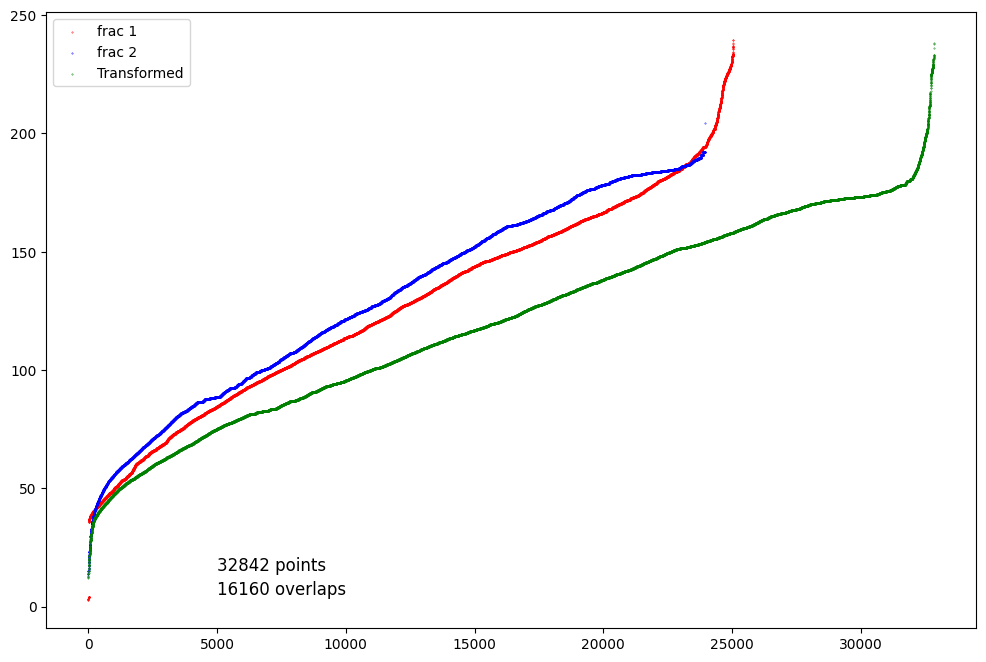

In [83]:
print("Plotting...")

# order by transformed retention time
sorted_result = result.sort_values(by=['Transformed Retention Time'])

#plot the retention time
# plt.scatter(range(len(result)), sorted_result["Scan Retention Time_x"].to_numpy(), s = 0.3, label = "A549", c='red')
# plt.scatter(range(len(result)), sorted_result["Scan Retention Time_y"].to_numpy(), s = 0.3, label = "GAMG", c='blue')
plt.scatter(range(len(sorted_result)), sorted_result.sort_values(by=['Scan Retention Time_x'])["Scan Retention Time_x"].to_numpy(), s = 0.1, label = "frac 1", c='red')
plt.scatter(range(len(sorted_result)), sorted_result.sort_values(by=['Scan Retention Time_y'])["Scan Retention Time_y"].to_numpy(), s = 0.1, label = "frac 2", c='blue')
plt.scatter(range(len(sorted_result)), sorted_result["Transformed Retention Time"].to_numpy(), s = 0.1, label = "Transformed", c='green')
#how many points in the plot
plt.text(5000, 15, str(len(result)) + " points", fontsize=12)
# how many overlaps
plt.text(5000, 5, str(len(overlap)) + " overlaps", fontsize=12)
plt.legend()
# 12, 8 size
plt.rcParams["figure.figsize"] = [12,8]
plt.show()

In [21]:
result.sample(frac=1)

,File Name_x,Scan Number_x,Scan Retention Time_x,Num Experimental Peaks_x,Total Ion Current_x,Precursor Scan Number_x,Precursor Charge_x,Precursor MZ_x,Precursor Mass_x,Score_x,...,Improvement Possible_y,Cumulative Target_y,Cumulative Decoy_y,QValue_y,Cumulative Target Notch_y,Cumulative Decoy Notch_y,QValue Notch_y,PEP_y,PEP_QValue_y,Transformed Retention Time
2251,20100721_Velos1_TaGe_SA_A549_01-calib-averaged,20527.0,89.93379,200.0,1.368751e+06,20519.0,2.0,566.31387,1130.61320,9.170,...,,54304.0,5.0,0.000087,53062.0,5.0,0.000089,0.000002,0.000001,89.93379
170754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,,65559.0,22.0,0.000335,63755.0,21.0,0.000326,0.008609,0.000295,NaN
21565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,,67480.0,25.0,0.000368,1972.0,2.0,0.000978,0.000072,0.000017,NaN
51550,20100721_Velos1_TaGe_SA_A549_06-calib-averaged,25920.0,162.30004,200.0,4.275386e+05,25914.0,2.0,711.86718,1421.71981,8.052,...,,94707.0,1753.0,0.018510,4301.0,593.0,0.137779,0.000099,0.000020,162.30004
6834,20100721_Velos1_TaGe_SA_A549_02-calib-averaged,28769.0,134.67269,200.0,1.679129e+05,28763.0,4.0,954.21537,3812.83239,9.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134.67269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96152,20100604_Velos1_TaGe_SA_A549_1-calib-averaged,23954.0,105.95919,80.0,1.002575e+06,23945.0,2.0,477.30599,952.59743,7.290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.95919
12926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,,115667.0,14533.0,0.125645,10522.0,6330.0,0.601443,1.000000,0.269844,NaN
163153,20100721_Velos1_TaGe_SA_A549_02-calib-averaged,47818.0,235.17272,196.0,6.607857e+04,47815.0,2.0,828.94516,1655.87577,7.086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,235.17272
44694,20100604_Velos1_TaGe_SA_A549_2-calib-averaged,17999.0,125.51914,170.0,2.626022e+05,17990.0,3.0,523.94571,1568.81530,12.238,...,,38371.0,0.0,0.000000,37682.0,0.0,0.000000,0.000010,0.000003,125.51914


In [112]:
#read in the data
leader = pd.read_csv(r"D:\MannPeptideResults\A549_AllPeptides.psmtsv", sep='\t')
follower = pd.read_csv(r"D:\MannPeptideResults\GAMG_AllPeptides.psmtsv", sep='\t')
leader["isCalibrated"] = False
follower["isCalibrated"] = False
leader["CalibratedRetentionTime"] = 0
follower["CalibratedRetentionTime"] = 0

C:\Users\elabo\AppData\Local\Temp\ipykernel_20008\4281750613.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  leader = pd.read_csv(r"D:\MannPeptideResults\A549_AllPeptides.psmtsv", sep='\t')
C:\Users\elabo\AppData\Local\Temp\ipykernel_20008\4281750613.py:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  follower = pd.read_csv(r"D:\MannPeptideResults\GAMG_AllPeptides.psmtsv", sep='\t')


In [113]:
leader.head()

,File Name,Scan Number,Scan Retention Time,Num Experimental Peaks,Total Ion Current,Precursor Scan Number,Precursor Charge,Precursor MZ,Precursor Mass,Score,...,Cumulative Target,Cumulative Decoy,QValue,Cumulative Target Notch,Cumulative Decoy Notch,QValue Notch,PEP,PEP_QValue,isCalibrated,CalibratedRetentionTime
0,20100721_Velos1_TaGe_SA_A549_03-calib-averaged,35061,166.06129,200.0,173626.07211,35054,3.0,1194.56080,3580.66056,44.352,...,1,0,0.0,1,0,0.0,4.327297e-05,0.000007,False,0
1,20100604_Velos1_TaGe_SA_A549_5-calib-averaged,18271,175.24016,200.0,54667.10225,18263,3.0,1199.89125,3596.65192,44.332,...,2,0,0.0,2,0,0.0,5.960464e-08,0.000000,False,0
2,20101215_Velos1_TaGe_SA_A549_04-calib-averaged,5125,34.39925,200.0,171336.84586,5121,3.0,1075.10117,3222.28167,42.385,...,3,0,0.0,3,0,0.0,0.000000e+00,0.000000,False,0
3,20100604_Velos1_TaGe_SA_A549_5-calib-averaged,18085,173.39687,200.0,117206.06203,18076,3.0,1270.31431,3807.92111,40.298,...,4,0,0.0,4,0,0.0,5.960464e-08,0.000000,False,0
4,20100604_Velos1_TaGe_SA_A549_2-calib-averaged,4932,53.87480,200.0,480516.13519,4923,3.0,1104.77479,3311.30254,39.281,...,5,0,0.0,5,0,0.0,3.635883e-06,0.000001,False,0


In [114]:
follower.head()

,File Name,Scan Number,Scan Retention Time,Num Experimental Peaks,Total Ion Current,Precursor Scan Number,Precursor Charge,Precursor MZ,Precursor Mass,Score,...,Cumulative Target,Cumulative Decoy,QValue,Cumulative Target Notch,Cumulative Decoy Notch,QValue Notch,PEP,PEP_QValue,isCalibrated,CalibratedRetentionTime
0,20100609_Velos1_TaGe_SA_GAMG_2-calib-averaged,25900,179.40163,200.0,35304.65143,25892,3.0,1194.55999,3580.65813,51.369,...,1,0,0.0,1,0,0.0,4.470348e-06,0.000001,False,0
1,20100609_Velos1_TaGe_SA_GAMG_4-calib-averaged,4294,52.28946,200.0,329791.09637,4285,3.0,1075.10047,3222.27959,41.420,...,2,0,0.0,2,0,0.0,6.556511e-07,0.000000,False,0
2,20101227_Velos1_TaGe_SA_GAMG_101230100451-cali...,48828,203.89629,153.0,428980.85883,48826,3.0,883.82032,2648.43913,40.232,...,3,0,0.0,3,0,0.0,2.801418e-06,0.000001,False,0
3,20101227_Velos1_TaGe_SA_GAMG2_101229143203-cal...,1273,12.85132,200.0,473899.70953,1270,3.0,994.40879,2980.20453,39.281,...,4,0,0.0,4,0,0.0,8.851290e-05,0.000019,False,0
4,20100609_Velos1_TaGe_SA_GAMG_5-calib-averaged,20406,173.22232,200.0,525483.39508,20404,4.0,952.99034,3807.93226,39.271,...,5,0,0.0,5,0,0.0,1.132488e-06,0.000000,False,0


In [116]:
#sort both dataframes by retention time
leader = leader.sort_values(by=['Scan Retention Time'])
follower = follower.sort_values(by=['Scan Retention Time'])

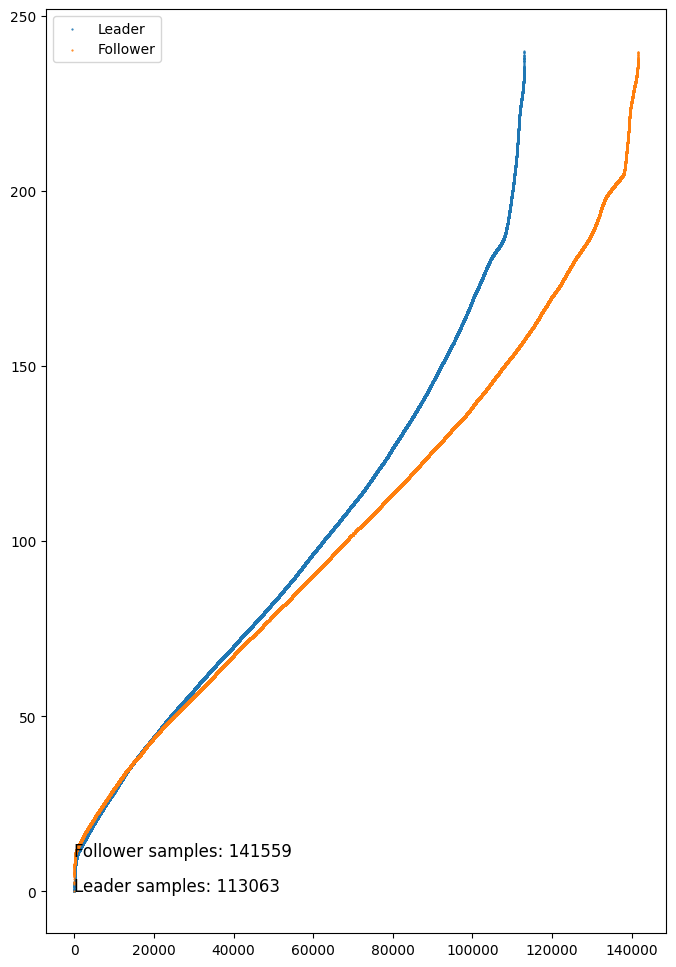

In [122]:
# visualize both datasets rts
plt.scatter(range(len(leader)), leader['Scan Retention Time'], s = 0.3, label='Leader')
plt.scatter(range(len(follower)), follower['Scan Retention Time'], s = 0.3, label='Follower')
# samples in leader
plt.text(2, 0, 'Leader samples: ' + str(len(leader)), fontsize=12)
# samples in follower
plt.text(2, 10, 'Follower samples: ' + str(len(follower)), fontsize=12)
plt.legend()
plt.show()

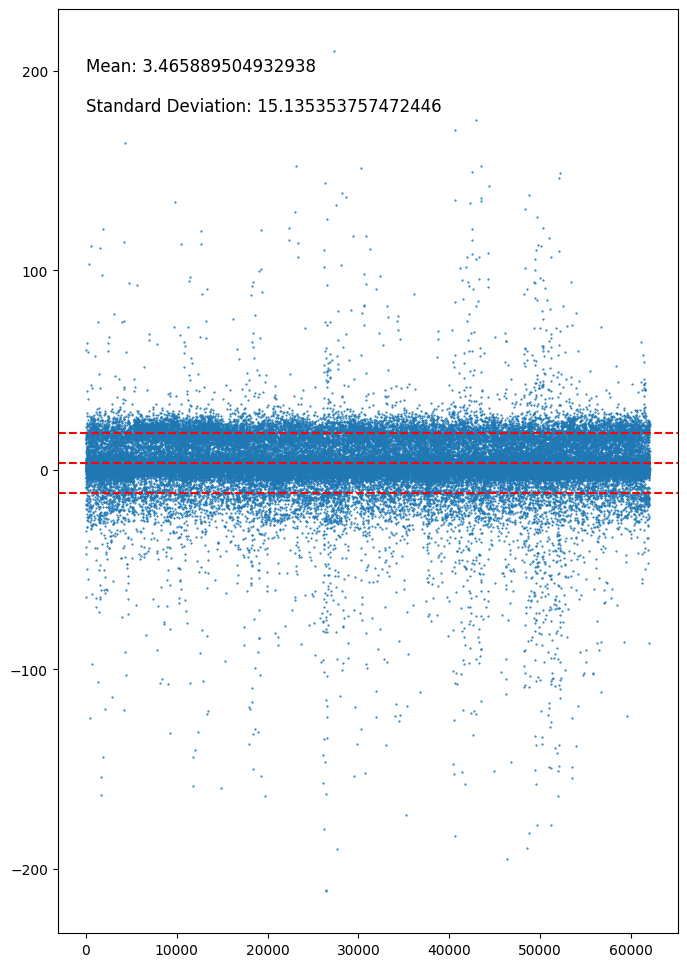

In [143]:
# find the overlapping full sequences between the two datasets, bring the entire row
overlap = pd.merge(leader, follower, on='Full Sequence', how='inner')

#sort the overlapping dataframes by full sequence and retention time
overlap = overlap.sort_values(by=['Full Sequence', 'Scan Retention Time_x'])
leader = leader.sort_values(by=['Full Sequence', 'Scan Retention Time'])
follower = follower.sort_values(by=['Full Sequence', 'Scan Retention Time'])

#get residuals 
overlap['residuals'] = overlap['Scan Retention Time_x'] - overlap['Scan Retention Time_y']

# visualize the residuals
plt.scatter(range(len(overlap)), overlap['residuals'], s = 0.3)
# calculate the mean and standard deviation of the residuals
mean = overlap['residuals'].mean()
std = overlap['residuals'].std()
# plot the mean and standard deviation
plt.axhline(mean, color='red', linestyle='dashed')
plt.axhline(mean + std, color='red', linestyle='dashed')
plt.axhline(mean - std, color='red', linestyle='dashed')
# show the standard error
plt.text(2, 200, 'Mean: ' + str(mean), fontsize=12)
plt.text(2, 180, 'Standard Deviation: ' + str(std), fontsize=12)
plt.show()


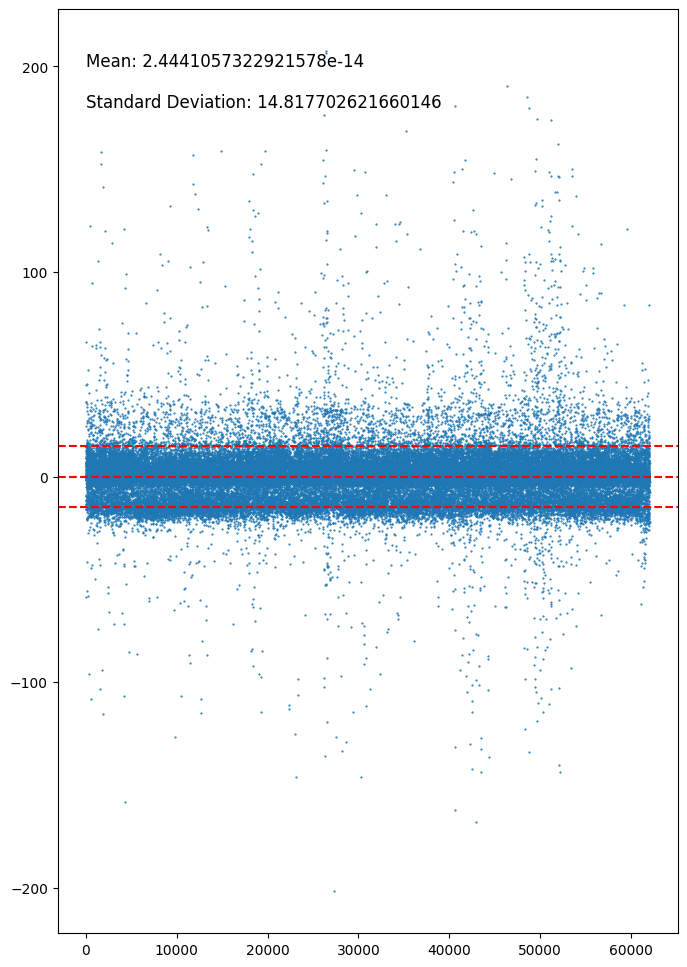

In [144]:
# make a regression model to calibrate the retention time of the follower dataset to the leader dataset
from sklearn.linear_model import LinearRegression

# fit the model
model = LinearRegression()
model.fit(overlap['Scan Retention Time_y'].values.reshape(-1, 1), overlap['Scan Retention Time_x'].values)

# predict the calibrated retention time
overlap['CalibratedRetentionTime'] = model.predict(overlap['Scan Retention Time_y'].values.reshape(-1, 1))

# visualize the residuals after calibration
overlap['residuals'] = overlap['CalibratedRetentionTime'] - overlap['Scan Retention Time_x']

plt.scatter(range(len(overlap)), overlap['residuals'], s = 0.3)
# calculate the mean and standard deviation of the residuals
mean = overlap['residuals'].mean()
std = overlap['residuals'].std()
# plot the mean and standard deviation
plt.axhline(mean, color='red', linestyle='dashed')
plt.axhline(mean + std, color='red', linestyle='dashed')
plt.axhline(mean - std, color='red', linestyle='dashed')
plt.text(2, 200, 'Mean: ' + str(mean), fontsize=12)
plt.text(2, 180, 'Standard Deviation: ' + str(std), fontsize=12)
plt.show()

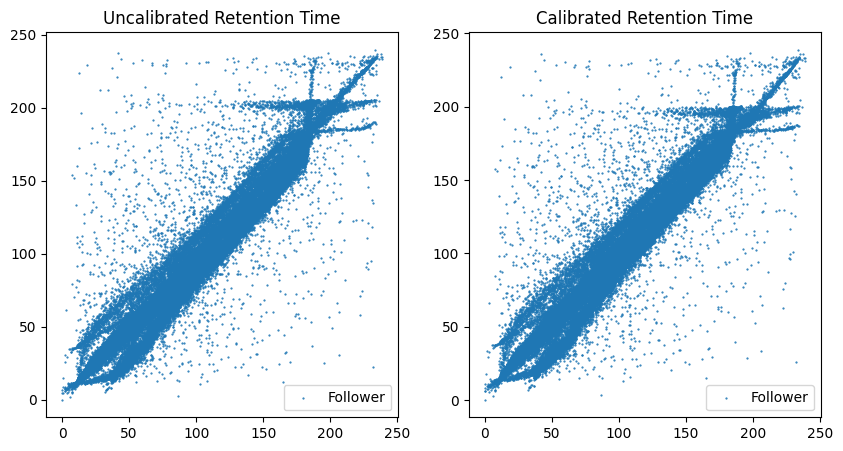

In [147]:
# use a lowess model to calibrate the retention time of the follower dataset to the leader dataset
from statsmodels.nonparametric.smoothers_lowess import lowess

# calculate the lowess model
calibration = lowess(overlap['Scan Retention Time_x'], overlap['Scan Retention Time_y'], frac=0.1)

# predict the calibrated retention time
overlap['CalibratedRetentionTime'] = np.interp(overlap['Scan Retention Time_y'], calibration[:, 0], calibration[:, 1])

# two plots to compare the calibrated retention time
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# plot the uncalibrated retention time
ax[0].scatter(overlap['Scan Retention Time_x'], overlap["Scan Retention Time_y"], s = 0.3, label='Follower')
ax[0].legend()
ax[0].set_title('Uncalibrated Retention Time')

# plot the calibrated retention time
ax[1].scatter(overlap['Scan Retention Time_x'], overlap['CalibratedRetentionTime'], s = 0.3, label='Follower')
ax[1].legend()
ax[1].set_title('Calibrated Retention Time')

plt.show()

In [89]:
# get a list of full sequences that are present in both dataframes
leader_seqs = set(leader['Full Sequence'])
follower_seqs = set(follower['Full Sequence'])
common_seqs = leader_seqs.intersection(follower_seqs)
len(common_seqs)

62032

In [90]:
# make a dataframe with only the common sequences and bring their Scan Retention Time
leader_common = leader[leader['Full Sequence'].isin(common_seqs)]
follower_common = follower[follower['Full Sequence'].isin(common_seqs)]

#order the dataframes by Scan Retention Time
leader_common = leader_common.sort_values(by=['Scan Retention Time'])
follower_common = follower_common.sort_values(by=['Scan Retention Time'])

In [91]:
leader_common.head()

,File Name,Scan Number,Scan Retention Time,Num Experimental Peaks,Total Ion Current,Precursor Scan Number,Precursor Charge,Precursor MZ,Precursor Mass,Score,...,Localized Scores,Improvement Possible,Cumulative Target,Cumulative Decoy,QValue,Cumulative Target Notch,Cumulative Decoy Notch,QValue Notch,PEP,PEP_QValue
48953,20100604_Velos1_TaGe_SA_A549_1-calib-averaged,3,0.02355,109.0,51204.89966,1,2.0,335.71595,669.41735,11.418,...,,,48950,4,0.000079,48217,4,0.000080,2.384186e-07,0.000000
89815,20101215_Velos1_TaGe_SA_A549_01-calib-averaged,5,0.03020,122.0,235025.06673,1,2.0,360.68614,719.35773,7.131,...,,,87764,2052,0.023381,84871,1347,0.015871,9.923438e-01,0.061892
22634,20100604_Velos1_TaGe_SA_A549_1-calib-averaged,6,0.07233,140.0,22835.54851,1,2.0,422.74775,843.48094,15.388,...,,,22635,0,0.000000,22422,0,0.000000,0.000000e+00,0.000000
87283,20100604_Velos1_TaGe_SA_A549_1-calib-averaged,23,0.38558,108.0,13599.66106,22,2.0,401.26278,800.51102,7.262,...,,,85779,1505,0.017538,83084,995,0.011971,7.262883e-01,0.014808
68562,20101215_Velos1_TaGe_SA_A549_01-calib-averaged,62,0.47960,91.0,75459.24965,61,2.0,421.26723,840.51990,9.203,...,,,68498,65,0.000947,67169,58,0.000861,2.348423e-05,0.000005


In [92]:
follower_common.head()

,File Name,Scan Number,Scan Retention Time,Num Experimental Peaks,Total Ion Current,Precursor Scan Number,Precursor Charge,Precursor MZ,Precursor Mass,Score,...,Localized Scores,Improvement Possible,Cumulative Target,Cumulative Decoy,QValue,Cumulative Target Notch,Cumulative Decoy Notch,QValue Notch,PEP,PEP_QValue
58554,20100609_Velos1_TaGe_SA_GAMG_1-calib-averaged,4,0.04280,137.0,27715.36637,1,2.0,335.71578,669.41701,11.360,...,,,58549,6,0.000097,57035,6,0.000100,4.768372e-07,0.000000
30259,20100609_Velos1_TaGe_SA_GAMG_1-calib-averaged,128,2.04015,131.0,20253.64340,125,2.0,422.74736,843.48016,15.456,...,,,30260,0,0.000000,29756,0,0.000000,1.192093e-07,0.000000
101440,20100723_Velos1_TaGe_SA_Gamg_2-calib-averaged,387,2.66284,120.0,82675.94406,385,2.0,398.21195,794.40935,7.230,...,,,98698,2743,0.027789,5049,1006,0.199247,9.998115e-01,0.199025
52026,20100609_Velos1_TaGe_SA_GAMG_1-calib-averaged,270,4.36608,94.0,85616.68546,269,2.0,382.21414,762.41373,12.250,...,,,52025,2,0.000037,50837,2,0.000038,2.980232e-07,0.000000
79421,20100609_Velos1_TaGe_SA_GAMG_1-calib-averaged,301,4.85428,115.0,10866.52318,299,2.0,460.25942,918.50429,9.171,...,,,79295,127,0.001600,76658,111,0.001447,1.865625e-05,0.000006


In [93]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# get lowess model 
leader_lowess = lowess(follower_common["Scan Retention Time"], leader_common['Scan Retention Time'], frac=0.1)

# interpolate the follower retention times
follower_common['Transformed Retention Time'] = np.interp(follower_common['Scan Retention Time'], leader_common['Scan Retention Time'], leader_lowess[:,1])

print(follower_common.head())


                                            File Name  Scan Number  \
58554   20100609_Velos1_TaGe_SA_GAMG_1-calib-averaged            4   
30259   20100609_Velos1_TaGe_SA_GAMG_1-calib-averaged          128   
101440  20100723_Velos1_TaGe_SA_Gamg_2-calib-averaged          387   
52026   20100609_Velos1_TaGe_SA_GAMG_1-calib-averaged          270   
79421   20100609_Velos1_TaGe_SA_GAMG_1-calib-averaged          301   

        Scan Retention Time  Num Experimental Peaks  Total Ion Current  \
58554               0.04280                   137.0        27715.36637   
30259               2.04015                   131.0        20253.64340   
101440              2.66284                   120.0        82675.94406   
52026               4.36608                    94.0        85616.68546   
79421               4.85428                   115.0        10866.52318   

        Precursor Scan Number  Precursor Charge  Precursor MZ  Precursor Mass  \
58554                       1               2.0     3

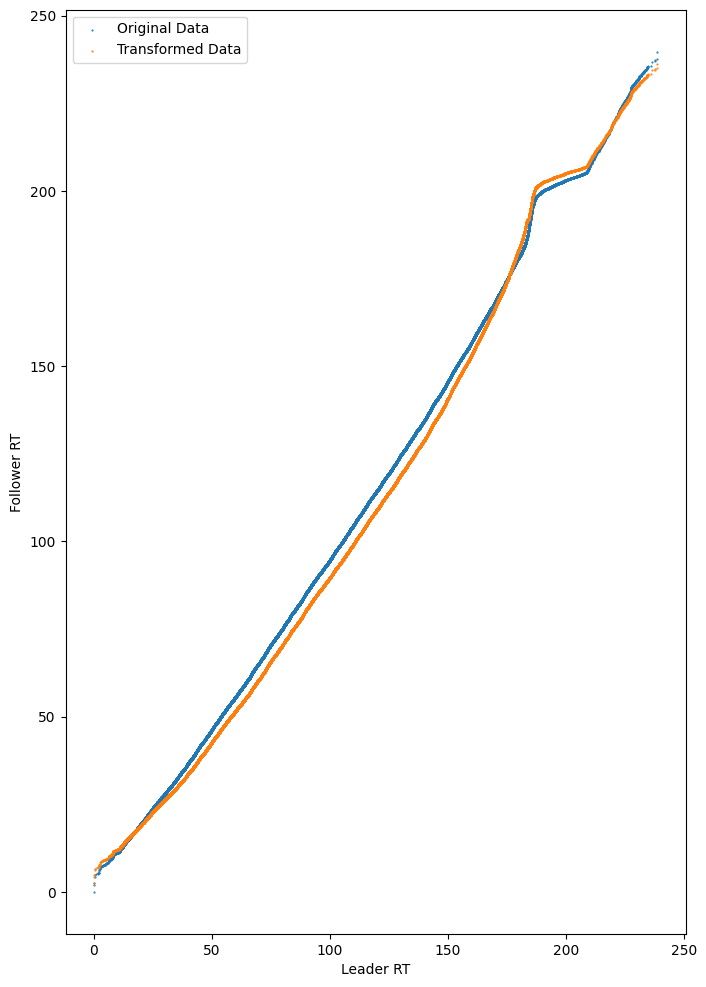

In [94]:
# plot the data
# plt.scatter(follower_common['Scan Retention Time'].to_numpy(), follower_common['Scan Retention Time'].to_numpy(), s=0.3)
# plt.scatter(leader_common['Scan Retention Time'], follower_common['Transformed Retention Time'], s=0.3)
plt.scatter(leader_common['Scan Retention Time'], follower_common['Scan Retention Time'], s=0.3, label='Original Data')
plt.scatter(leader_common['Scan Retention Time'], follower_common['Transformed Retention Time'], s=0.3, label='Transformed Data')
# plt.plot(leader_lowess[:,0], leader_lowess[:,1], color='red', linewidth=2)
plt.xlabel('Leader RT')
plt.ylabel('Follower RT')
#increase plot size
# plt.rcParams["figure.figsize"] = ()
plt.legend()
plt.show()

In [95]:
# drop from both original dataframes the rows that are not in the common sequences
leader_not_shared = leader[leader['Full Sequence'].isin(common_seqs) == False] 
follower_not_shared = follower[follower['Full Sequence'].isin(common_seqs) == False]

In [96]:
len(leader_not_shared), len(follower_not_shared), len(leader_common), len(follower_common)

(51031, 79527, 62032, 62032)

C:\Users\elabo\AppData\Local\Temp\ipykernel_20008\1746076882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leader_not_shared['Transformed Retention Time'] = np.interp(leader_not_shared['Scan Retention Time'], leader_common['Scan Retention Time'], leader_lowess[:,1])
C:\Users\elabo\AppData\Local\Temp\ipykernel_20008\1746076882.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  follower_not_shared['Transformed Retention Time'] = np.interp(follower_not_shared['Scan Retention Time'], leader_common['Scan 

ValueError: x and y must be the same size

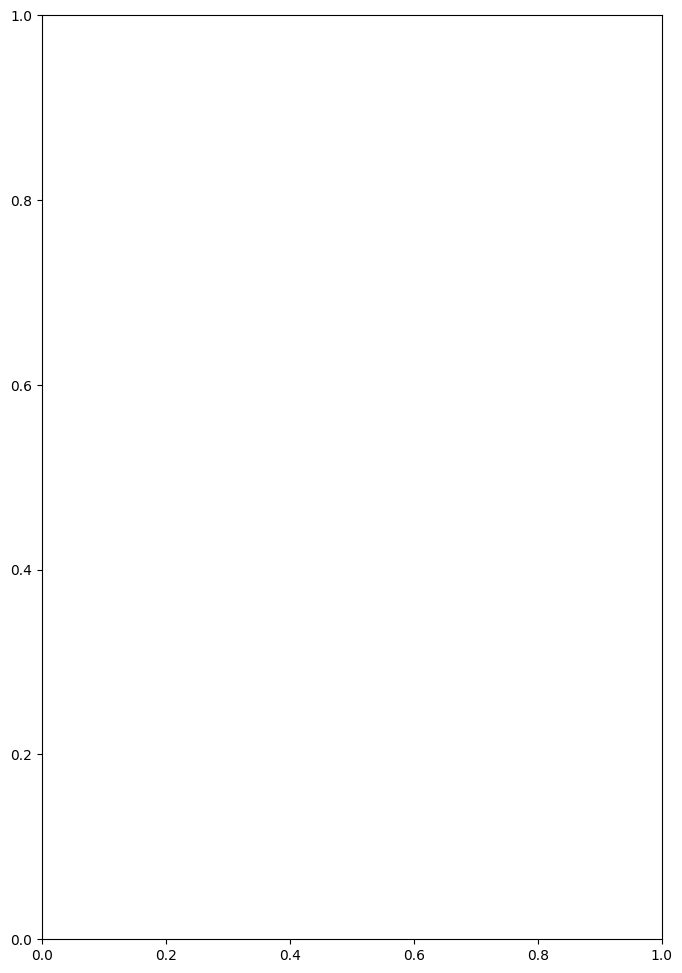

In [109]:
# interpolate the rest of the data using the valibrated times
leader_not_shared['Transformed Retention Time'] = np.interp(leader_not_shared['Scan Retention Time'], leader_common['Scan Retention Time'], leader_lowess[:,1])
follower_not_shared['Transformed Retention Time'] = np.interp(follower_not_shared['Scan Retention Time'], leader_common['Scan Retention Time'], leader_lowess[:,1])

# concatenate the dataframes
leader_final = pd.concat([leader_common, leader_not_shared])
follower_final = pd.concat([follower_common, follower_not_shared])

# sort the final dataframe by Scan Retention Time
leader_final = leader_final.sort_values(by=['Scan Retention Time'])
follower_final = follower_final.sort_values(by=['Scan Retention Time'])

#plot both dataframes
plt.scatter(leader_final['Scan Retention Time'], follower_final['Scan Retention Time'], s=0.3, label='Original Data')
plt.scatter(leader_final['Scan Retention Time'], follower_final['Transformed Retention Time'], s=0.3, label='Transformed Data')
plt.xlabel('Leader RT')
plt.ylabel('Follower RT')
plt.legend()
plt.show()

# join both final dataframes by their full sequences
final = pd.merge(leader_final, follower_final, on='Full Sequence', suffixes=('_Leader', '_Follower'))

# sort the final dataframe by Scan Retention Time
final = final.sort_values(by=['Scan Retention Time_Leader'])

# check if the interpolated data is correct
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#two scatter plots to compare the original and the transformed data
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

fig, axs = plt.subplots(1, 2, figsize=(12, 8))
axs[0].scatter(final['Scan Retention Time_Leader'], final['Scan Retention Time_Follower'], s=0.3)
axs[0].scatter(final['Scan Retention Time_Leader'], final['Scan Retention Time_Leader'], s=0.3)
axs[0].set_title('Original Data')
axs[0].set_xlabel('Leader RT')
axs[0].set_ylabel('Follower RT')
axs[0].text(0.1, 0.9, f'MSE: {mean_squared_error(final["Scan Retention Time_Leader"], final["Scan Retention Time_Follower"]):.2f}', transform=axs[0].transAxes)
axs[0].text(0.1, 0.8, f'R2: {r2_score(final["Scan Retention Time_Leader"], final["Scan Retention Time_Follower"]):.2f}', transform=axs[0].transAxes)
axs[0].text(0.1, 0.7, f'MAE: {mean_absolute_error(final["Scan Retention Time_Leader"], final["Scan Retention Time_Follower"]):.2f}', transform=axs[0].transAxes)
axs[0].text(0.1, 0.6, f'Explained Variance: {explained_variance_score(final["Scan Retention Time_Leader"], final["Scan Retention Time_Follower"]):.2f}', transform=axs[0].transAxes)

axs[1].scatter(final['Scan Retention Time_Leader'], final['Transformed Retention Time_Follower'], s=0.3)
axs[1].scatter(final['Scan Retention Time_Leader'], final['Scan Retention Time_Leader'], s=0.3)
axs[1].set_title('Transformed Data')
axs[1].set_xlabel('Leader RT')
axs[1].set_ylabel('Follower RT')
axs[1].text(0.1, 0.9, f'MSE: {mean_squared_error(final["Scan Retention Time_Leader"], final["Transformed Retention Time_Follower"]):.2f}', transform=axs[1].transAxes)
axs[1].text(0.1, 0.8, f'R2: {r2_score(final["Scan Retention Time_Leader"], final["Transformed Retention Time_Follower"]):.2f}', transform=axs[1].transAxes)
axs[1].text(0.1, 0.7, f'MAE: {mean_absolute_error(final["Scan Retention Time_Leader"], final["Transformed Retention Time_Follower"]):.2f}', transform=axs[1].transAxes)
axs[1].text(0.1, 0.6, f'Explained Variance: {explained_variance_score(final["Scan Retention Time_Leader"], final["Transformed Retention Time_Follower"]):.2f}', transform=axs[1].transAxes)
# add the number of points in each plot
axs[0].text(0.1, 0.5, f'N: {len(final)}', transform=axs[0].transAxes)


plt.show()


In [103]:
final.columns.values

array(['File Name_Leader', 'Scan Number_Leader',
       'Scan Retention Time_Leader', 'Num Experimental Peaks_Leader',
       'Total Ion Current_Leader', 'Precursor Scan Number_Leader',
       'Precursor Charge_Leader', 'Precursor MZ_Leader',
       'Precursor Mass_Leader', 'Score_Leader', 'Delta Score_Leader',
       'Notch_Leader', 'Base Sequence_Leader', 'Full Sequence',
       'Essential Sequence_Leader', 'Ambiguity Level_Leader',
       'PSM Count (unambiguous, <0.01 q-value)_Leader', 'Mods_Leader',
       'Mods Chemical Formulas_Leader',
       'Mods Combined Chemical Formula_Leader',
       'Num Variable Mods_Leader', 'Missed Cleavages_Leader',
       'Peptide Monoisotopic Mass_Leader', 'Mass Diff (Da)_Leader',
       'Mass Diff (ppm)_Leader', 'Protein Accession_Leader',
       'Protein Name_Leader', 'Gene Name_Leader', 'Organism Name_Leader',
       'Identified Sequence Variations_Leader', 'Splice Sites_Leader',
       'Contaminant_Leader', 'Decoy_Leader', 'Peptide Description_